## Capstone 1 -Data Story Telling – Predicting Lemon titles (Kicks) in Car Auctions
#### Objective:
> To predict if the car purchased at the auction is a good/bad buy among thousands of cars purchased through online auctions. The goal is to create a machine learning model to predict the condition of the vehicle being purchased at a car auction, if it is a good/bad buy, hence reducing the risk.  

#### Problem:
> Predict if the car being purchased at auction is Good or Bad buy?

#### Outcome:
>One of the challenges for an auto dealership in purchasing a used car at an auction is the risk of that vehicle might have serious issues that prevent it from being resold. These are referred to as “kicks” or unfortunate purchases and are often resulting in a significant loss. Some examples of kicks could be tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller or some unforeseen problem. Using machine learning to predict which cars have higher risk can provide real value to dealerships as they can predict kicks before the dealership buys at auctions.

#### Dataset:
>Source: https://www.kaggle.com/c/DontGetKicked/data

>Train set – 60%<br>
>Test set – 40%

>The data set contains information about each car, like purchase price, make and model, trim level, odometer reading, date of purchase, state of origin and so on. There are about 40 different variables (along with the lemon status indicator IsBadBuy) on around 72K cars, the test data set has the same information on around 40K cars. The target variable is “IsBadBuy” which is a binary variable and is a post-purchase classification for kicked on non-kicked cars.

#### Evaluation Metrics:
>The evaluation metrics for this problem are going to be the Gini Index, Classification Accuracy %, F1 Score, Precision, Recall, and Log Loss metrics.

In [50]:
## Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

In [51]:
# Input training data
df = pd.read_csv('C:\\Users\\09350\\Documents\\SpringBoard\\MiniProject1\\Capstone1\\EDA\\data\\training.csv')

> Dataframe Columns Overview

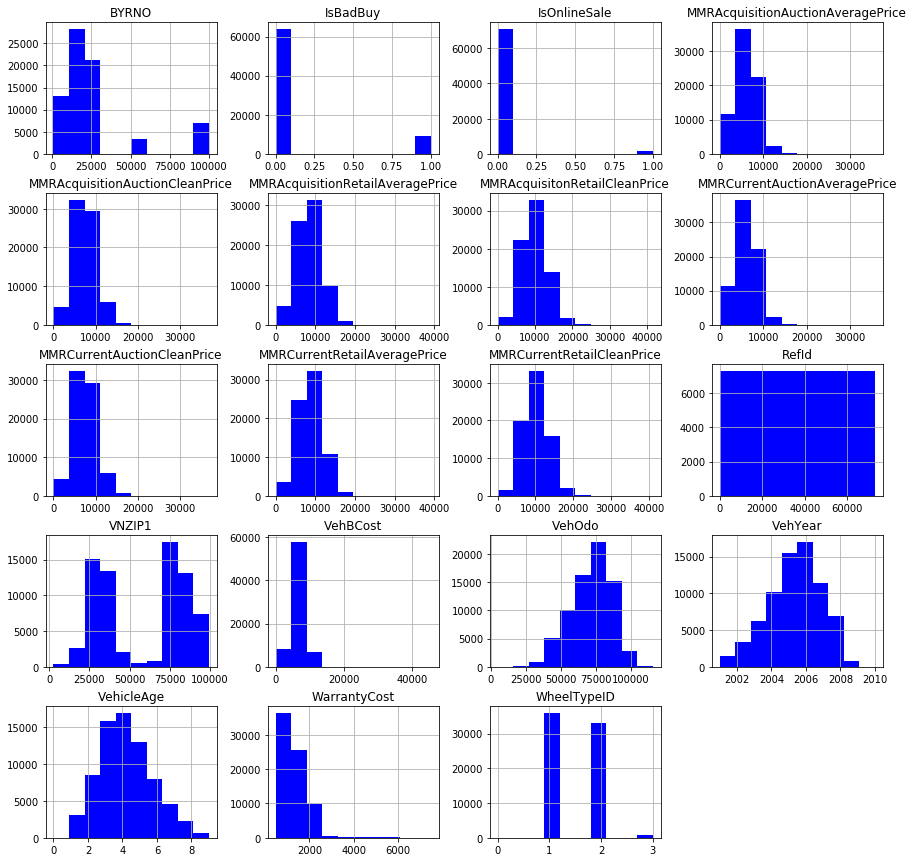

In [52]:
pd.DataFrame.hist(df, figsize= [15,15],color='b');

> Covariance Matrix to plot corelations

,IsBadBuy,IsOnlineSale,VehYear,VehicleAge,VehBCost,VehOdo,WarrantyCost,VNZIP1
IsBadBuy,1.000000,-0.003697,-0.158886,0.167164,-0.099911,0.082560,0.052319,0.005796
IsOnlineSale,-0.003697,1.000000,0.057380,-0.024771,0.034120,0.029556,0.003837,0.024889
VehYear,-0.158886,0.057380,1.000000,-0.957957,0.349965,-0.283719,-0.268696,0.068276
VehicleAge,0.167164,-0.024771,-0.957957,1.000000,-0.312329,0.319794,0.259310,-0.074857
VehBCost,-0.099911,0.034120,0.349965,-0.312329,1.000000,-0.062008,-0.033210,0.017065
VehOdo,0.082560,0.029556,-0.283719,0.319794,-0.062008,1.000000,0.411718,-0.053041
WarrantyCost,0.052319,0.003837,-0.268696,0.259310,-0.033210,0.411718,1.000000,-0.036173
VNZIP1,0.005796,0.024889,0.068276,-0.074857,0.017065,-0.053041,-0.036173,1.000000


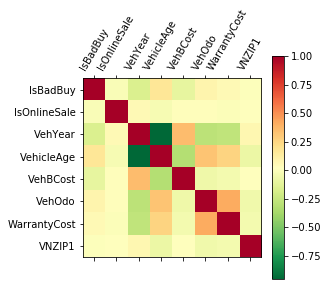

In [53]:
# Compute the Correlation matrix: covariance_matrix
df_1 = df[['IsBadBuy', 'IsOnlineSale','VehYear','VehicleAge','VehBCost','VehOdo','WarrantyCost','VNZIP1']]

df_1.corr()
# displaying Correlation between variables
display(df_1.corr())

# Correlation Plot
plt.matshow(df_1.corr(),cmap='RdYlGn_r')
plt.xticks(range(len(df_1.columns)), df_1.columns, rotation=60)
plt.yticks(range(len(df_1.columns)), df_1.columns)
plt.colorbar()
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

> Plotting Missing Values in the dataframe

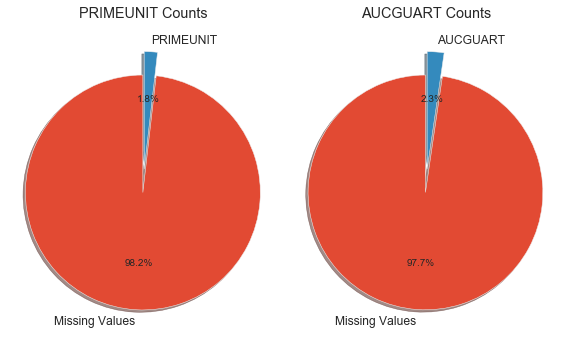

In [74]:
plt.style.use('ggplot')
labels = ['Missing Values','PRIMEUNIT']
labels2 = ['Missing Values','AUCGUART']
data = df['PRIMEUNIT'].value_counts()
data2 = df['AUCGUART'].value_counts()

# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.1, 0.1)

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.pie(data,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax1.set_title('PRIMEUNIT Counts')

ax2.pie(data2,
       explode=explode,
       labels=labels2,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax2.set_title('AUCGUART Counts')

fig.tight_layout()

plt.show()

> Exploring the Auction column and its frequncies

> Has 3 distinct values where are decently spread out

Text(0, 0.5, 'Frequency')

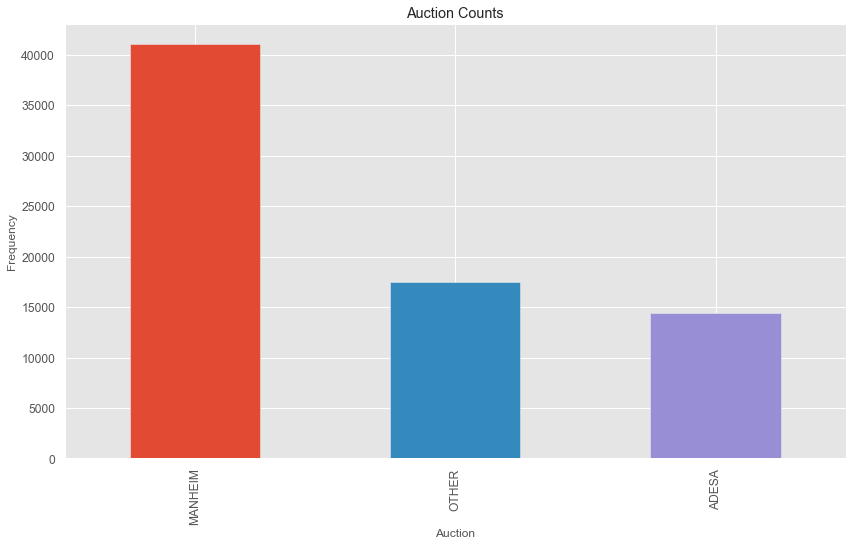

In [75]:
#Auction has only three discrete values and MANHIEM is the one with most occurances.
%matplotlib inline
plt.style.use('ggplot')

ax = df['Auction'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Auction Counts")
ax.set_xlabel("Auction")
ax.set_ylabel("Frequency")

> Plotting histogram for Vehicle Year

> The Distribution looks very normal

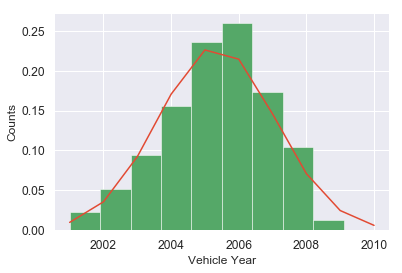

In [76]:
#plotting a histogram for VehYear
temp_df = df['VehYear'].sort_values()
n_bins = int(np.sqrt(len(temp_df)))
sns.set_style("darkgrid")
_ = plt.hist(temp_df, density=True, color='g')
_ = plt.plot(temp_df,norm.pdf(temp_df,np.mean(temp_df), np.std(temp_df)))
_ = plt.xlabel('Vehicle Year')
_ = plt.ylabel('Counts')
_ = plt.show()

> QQPlot
> if the data were normally distributed most of the points would be on the line.

> VehBCost is skewed with outliers

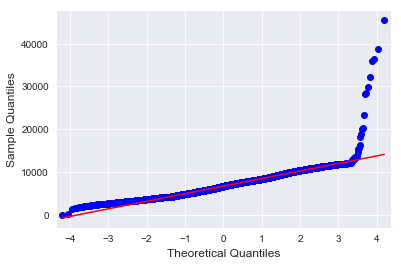

In [58]:
# plotting a Q-Q plot using graphical tests, shows a closely fitted line for normal distribution.
temp_df2 = df['VehBCost'].sort_values()
_ = qqplot(temp_df2, line='s')
_ = plt.show()

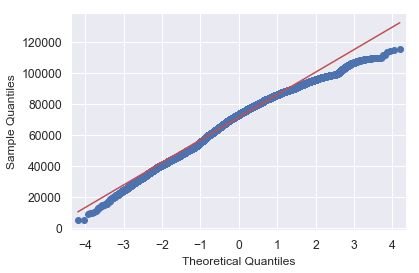

In [81]:
# plotting a Q-Q plot using graphical tests, shows a closely fitted line for normal distribution.
temp_df3 = df['VehOdo'].sort_values()
_ = qqplot(temp_df3, line='s')
_ = plt.show()

> Does the qqplot above show a normal distribution, lets do a normalility test.

> Normality Test on VehOdo using Shapiro-Wilk Test

In [82]:
# 1st normality test using Shapiro-Wilk Test
stat, p = shapiro(temp_df3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.01
if p > alpha:
    print('Sample looks normal (fail to reject H0)')
else:
    print('Sample does not look normal (reject H0)')

Statistics=0.982, p=0.000
Sample does not look normal (reject H0)


C:\Anaconda_3_7\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning:

p-value may not be accurate for N > 5000.



> Catagorical variable : Make looks to be right skewed and also a lot of values for american cars compared to others.

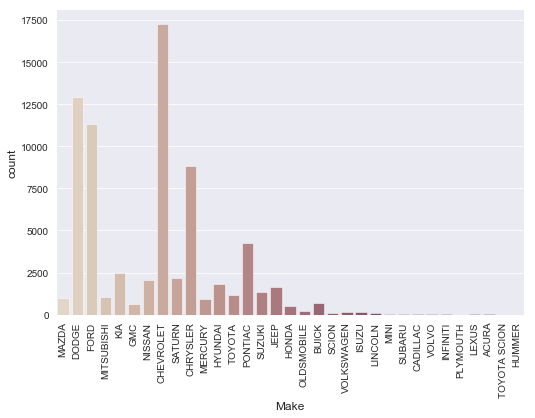

In [60]:
#plotting a histogram for VehYear
cat_plot_make = sns.catplot(x='Make', kind="count", palette="ch:.25",aspect=1.5, data=df)
cat_plot_make.set_xticklabels(rotation=90)

> Taking a look at the histogram we can see that very few of the avgprices at auction at above 15000

> Most of the prices are between 5000 and 10000

> Very few are greater than 15000

C:\Anaconda_3_7\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning:

invalid value encountered in greater_equal

C:\Anaconda_3_7\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning:

invalid value encountered in less_equal



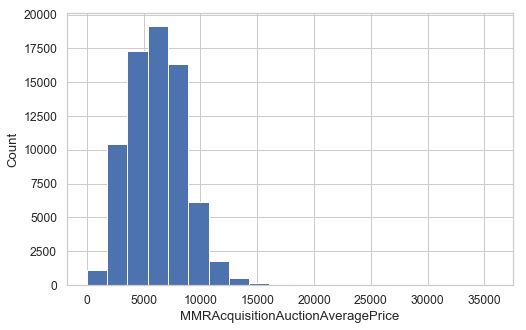

In [61]:
num_vars = ['VehYear','VehicleAge','WarrantyCost','VehOdo','VehBCost','VNZIP1',
           'MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice']

cat_vars = ['Auction','Transmission','WheelType','Nationality','Size','TopThreeAmericanName','IsOnlineSale','Color','IsBadBuy']

df_viz = df[num_vars + cat_vars]
df_viz.shape

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_viz['MMRAcquisitionAuctionAveragePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='MMRAcquisitionAuctionAveragePrice', ylabel='Count')

> Lets create histogram for all the numerical variables

> From the below viz we can see that following columns are right skewed<br>
    >MMRAcquisitionAuctionAveragePrice<br>
    >MMRAcquisitionAuctionCleanPrice<br>
    >VehBCost<br>
    >WarrentyCost<br>

> Following columns have a bimodel distribution<br>
    >VNZIP1<br>

> Following columns have normal distribution<br>
    >VehOdo<br>
    >VehYear<br>
    >VehcileAge<br>

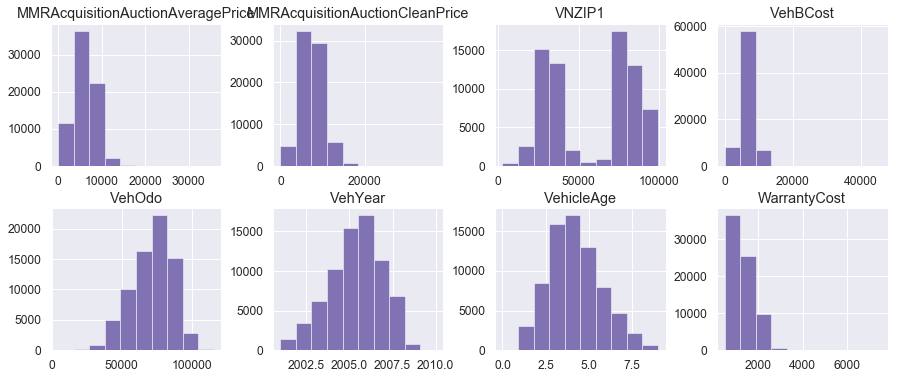

In [78]:
_ = df_viz[num_vars].hist(figsize=(15, 6), layout=(2, 4),color='m')
_ = plt.show()

> Analyzing categorical variables or labeled data in the dataframe.

> Bar charts best tell the story for these types of labeled data

> Data has less cars that were sold online, this might also be due the the timeframe for these auctions

> Most cars in the data set are Auto Transmissions compared to Manual Transmission.

> Color might have some impact as people prefer to pick color for cars.

> Nationality indicates mostly American.

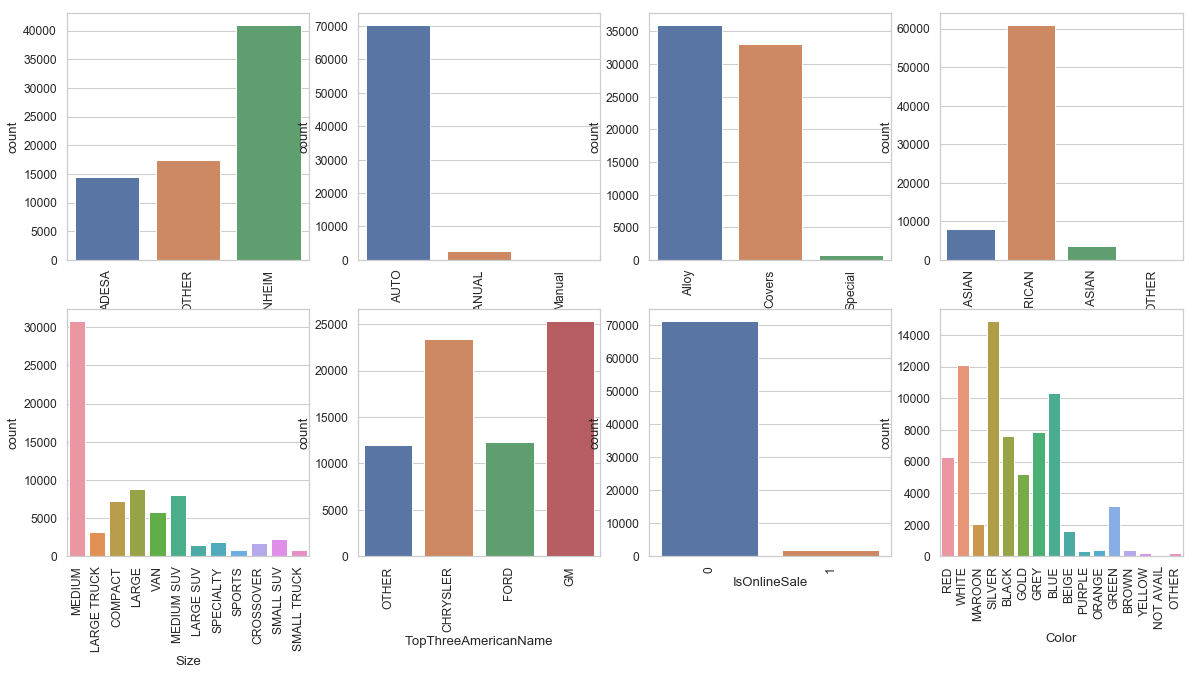

In [63]:
# for categorical variables
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(cat_vars, ax.flatten()):
    sns.countplot(df_viz[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

> Now that we've explored some numerical and categorical variables.

> Let's see if there are any relationships between these variables.

> Plotting a scatter plot between WarrantyCost and MMRAcquisitionAuctionAveragePrice

> There seems to be a positive relationship between these two variables.

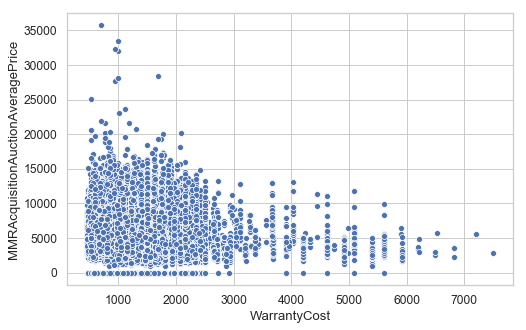

In [64]:
sns.scatterplot(x=df_viz['WarrantyCost'], y=df_viz['MMRAcquisitionAuctionAveragePrice']);

> Let's look at the marginal plot which shows both scatterplot along with histograms of each variables on the margins.

C:\Anaconda_3_7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



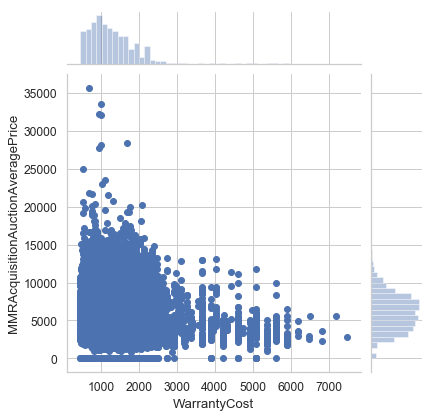

In [65]:
sns.jointplot(x=df_viz['WarrantyCost'], y=df_viz['MMRAcquisitionAuctionAveragePrice'])

> Lets make a subplots of box-whisker plots for showing conditional plots.

> IsBadBuy has lesser mean that non Bad Buy cars.

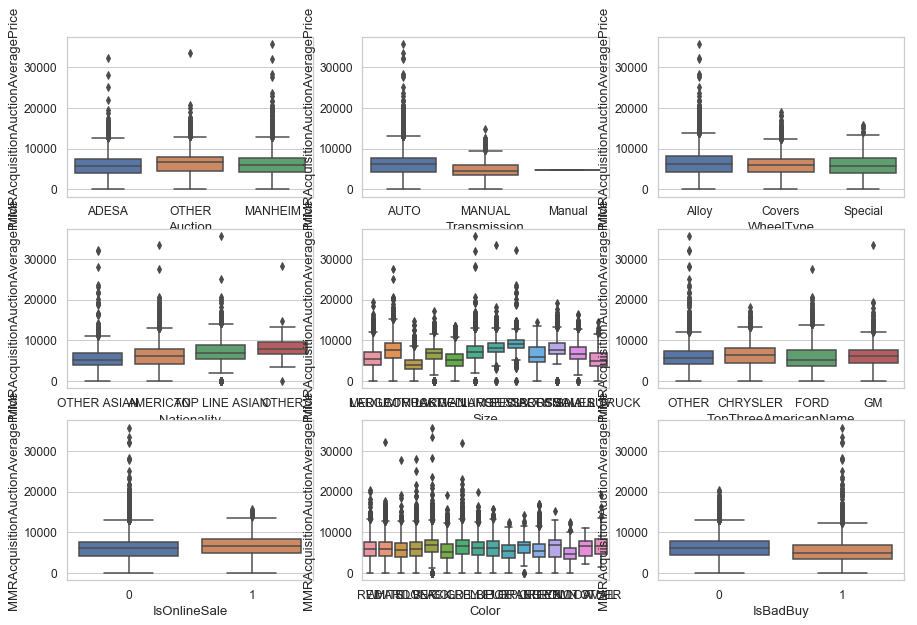

In [66]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(cat_vars, ax.flatten()):
    sns.boxplot(x=var, y='MMRAcquisitionAuctionAveragePrice', data=df_viz, ax=subplot)

> Let's see if there is a difference between Online buys and Non Online Buys

In [67]:
ol_buy = df[df['IsOnlineSale'] == 1]
non_ol_buy =  df[df['IsOnlineSale'] == 0]

ol_buy.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,1845.000000,1845.000000,1845.000000,1845.000000,1728.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1844.000000,1844.000000,1844.000000,1844.000000,1845.000000,1845.000000,1845.000000,1845.0,1845.000000
mean,30117.934417,0.115447,2005.959892,3.913279,1.472222,74175.575068,6722.263957,8027.226016,10077.023306,11483.627100,6733.723427,8060.584056,10299.161605,11716.555315,3599.098645,62084.711653,7105.480217,1.0,1290.849322
std,22249.350848,0.319647,1.522968,1.545430,0.527565,13272.386541,2425.272122,2678.599127,2836.415481,3049.770529,2352.209051,2588.389309,2664.081245,2849.898045,4626.333512,23369.747174,1657.293381,0.0,584.542889
min,893.000000,0.000000,2001.000000,1.000000,0.000000,8706.000000,0.000000,0.000000,0.000000,0.000000,1842.000000,2679.000000,3270.000000,4526.000000,1031.000000,8505.000000,2735.000000,1.0,462.000000
25%,11192.000000,0.000000,2005.000000,3.000000,1.000000,65912.000000,4947.000000,6097.000000,8051.000000,9291.000000,4944.750000,6125.000000,8265.750000,9545.500000,1191.000000,45005.000000,5855.000000,1.0,825.000000
50%,27278.000000,0.000000,2006.000000,4.000000,1.000000,75682.000000,6679.000000,7976.000000,10084.000000,11584.000000,6698.500000,8023.500000,10298.000000,11715.500000,1235.000000,60443.000000,7255.000000,1.0,1215.000000
75%,48820.000000,0.000000,2007.000000,5.000000,2.000000,83996.000000,8384.000000,9755.000000,11996.000000,13413.000000,8252.000000,9690.750000,12116.250000,13639.250000,10310.000000,84104.000000,8250.000000,1.0,1641.000000
max,72146.000000,1.000000,2009.000000,9.000000,3.000000,109366.000000,15622.000000,19185.000000,21764.000000,25526.000000,16230.000000,18954.000000,20734.000000,23790.000000,99741.000000,98064.000000,11615.000000,1.0,5613.000000


In [68]:
non_ol_buy.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,71138.000000,71138.000000,71138.000000,71138.000000,68086.000000,71138.000000,71120.000000,71120.000000,71120.000000,71120.000000,70824.000000,70824.000000,70824.000000,70824.000000,71138.000000,71138.000000,71138.000000,71138.0,71138.000000
mean,36677.246999,0.123183,2005.327054,4.183474,1.494859,71430.603419,6113.516367,7356.680554,8456.046147,9808.572652,6116.416709,7373.240003,8736.058525,10104.477748,26935.790450,57938.237665,6721.220289,0.0,1276.210928
std,21020.282455,0.328650,1.733413,1.715792,0.521122,14604.809744,2461.051874,2721.551777,3153.654500,3383.615291,2434.705868,2686.536482,3091.030093,3311.463139,25772.334717,26211.721302,1769.578404,0.0,599.212717
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.0,462.000000
25%,18572.250000,0.000000,2004.000000,3.000000,1.000000,61738.250000,4266.000000,5393.000000,6234.000000,7478.000000,4266.000000,5396.000000,6515.000000,7735.000000,17675.000000,30331.000000,5425.000000,0.0,837.000000
50%,36647.500000,0.000000,2005.000000,4.000000,1.000000,73305.000000,6079.500000,7286.000000,8396.500000,9737.000000,6038.000000,7294.000000,8679.000000,10052.000000,19662.000000,74135.000000,6700.000000,0.0,1155.000000
75%,54861.750000,0.000000,2007.000000,5.000000,2.000000,82390.750000,7747.000000,9002.000000,10609.000000,12047.000000,7724.000000,8995.000000,10856.250000,12282.250000,22808.000000,80022.000000,7900.000000,0.0,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,0.0,7498.000000


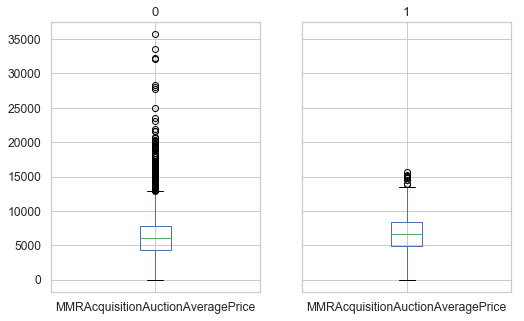

In [69]:
df_temp = df.groupby("IsOnlineSale")
df_temp.boxplot(column=['MMRAcquisitionAuctionAveragePrice'])
plt.show()

> There is some difference however, the data points for IsOnlineSale are very less comparie